In [1]:
library(rdydisstools)
loadpackages(c('doParallel', 'foreach', 'logging', 'glue', 'grid', 'gridExtra', 'dplyr', 'ggplot2'))
nDatasets <- 5
i <- 1

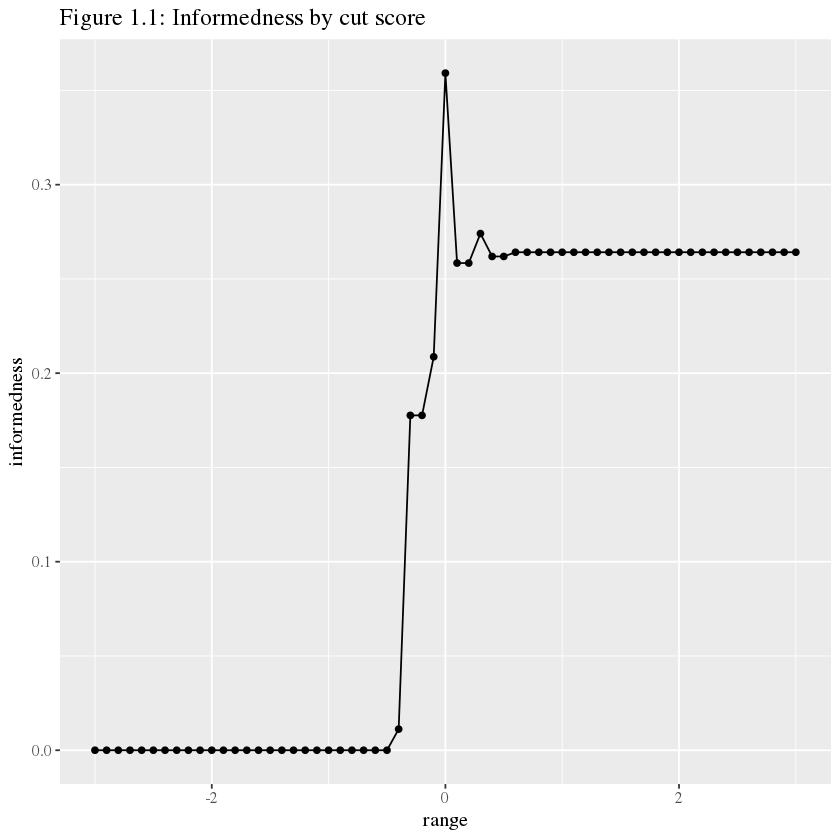

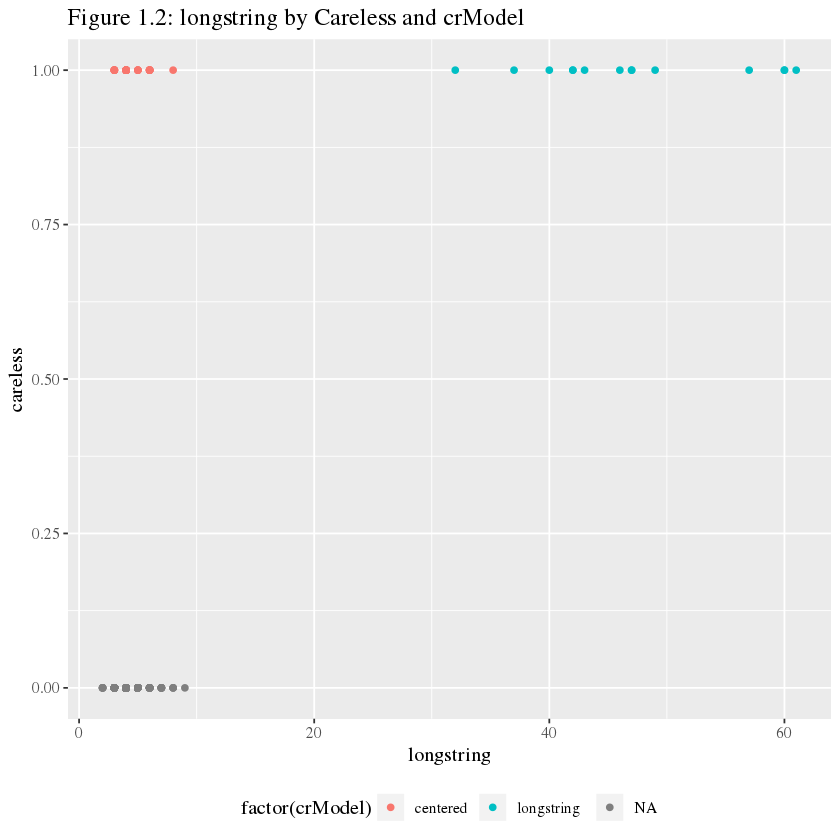

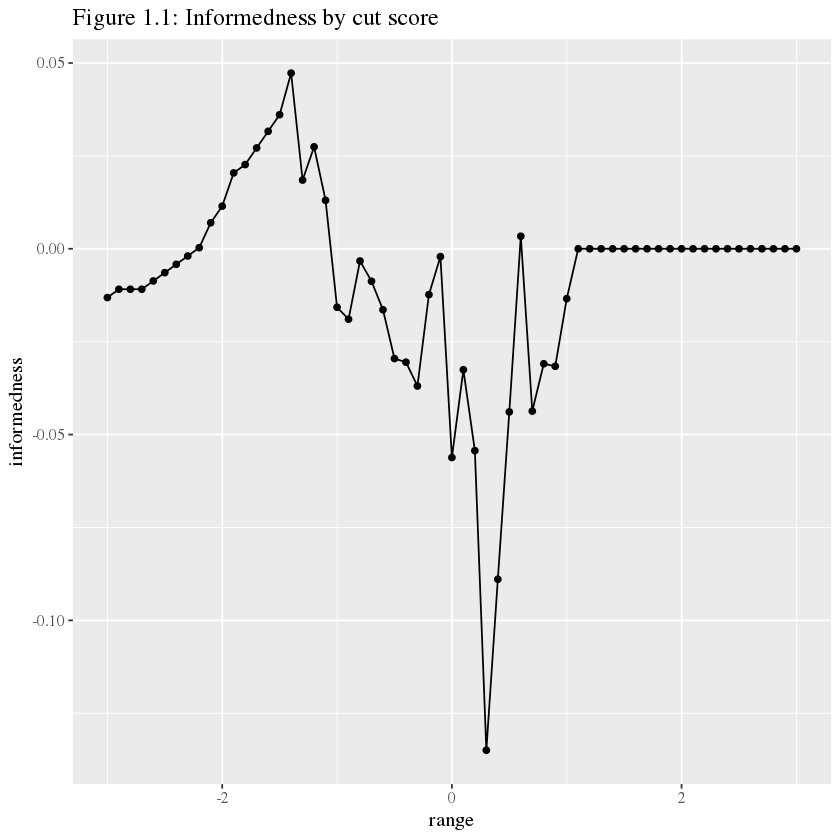

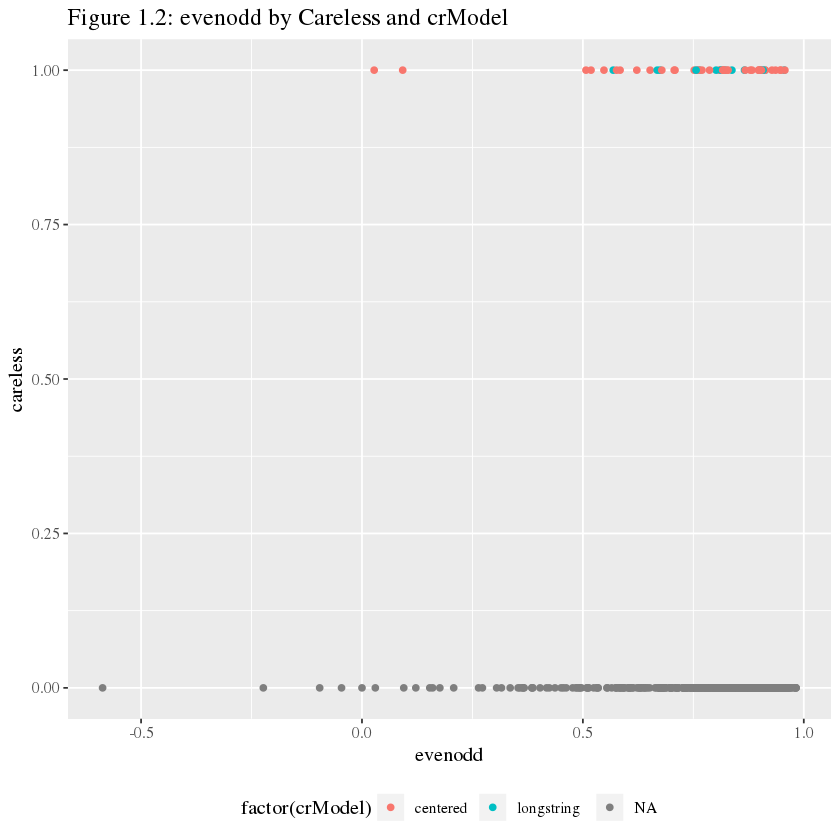

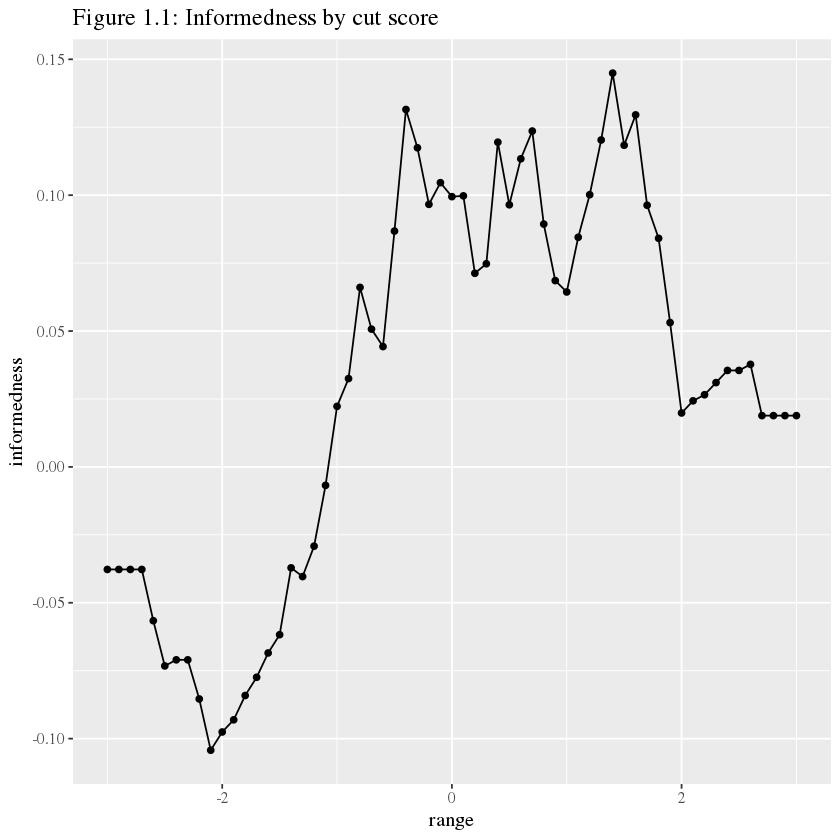

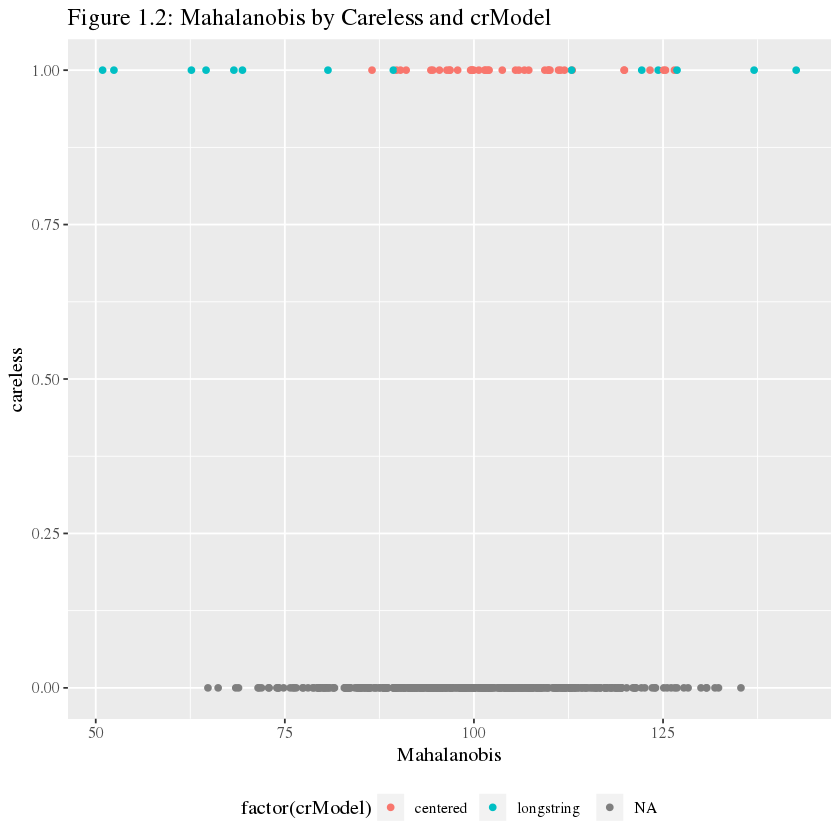

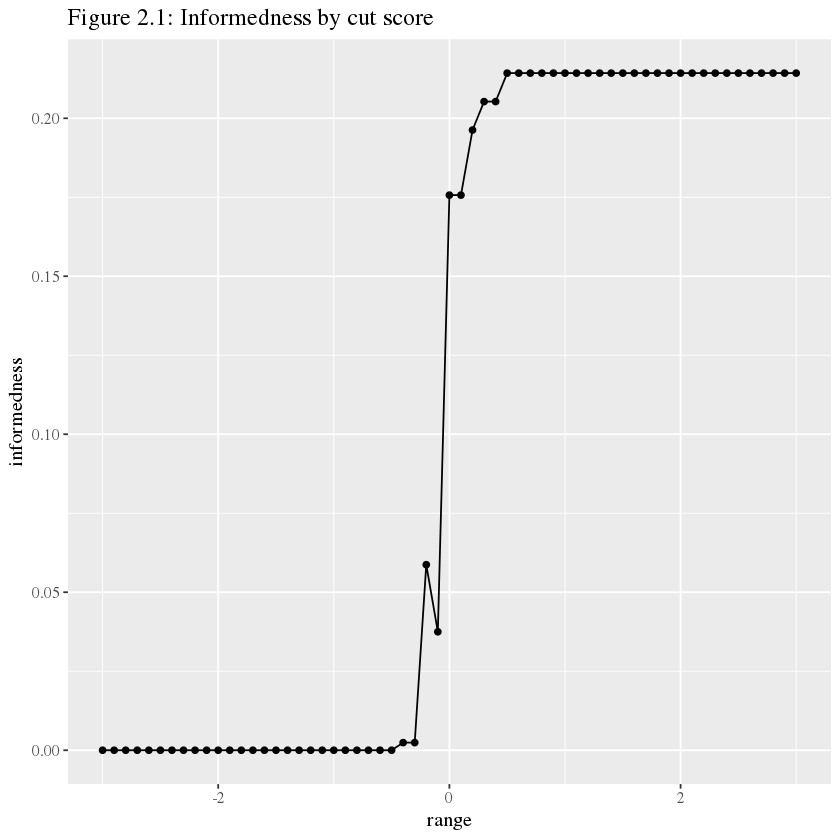

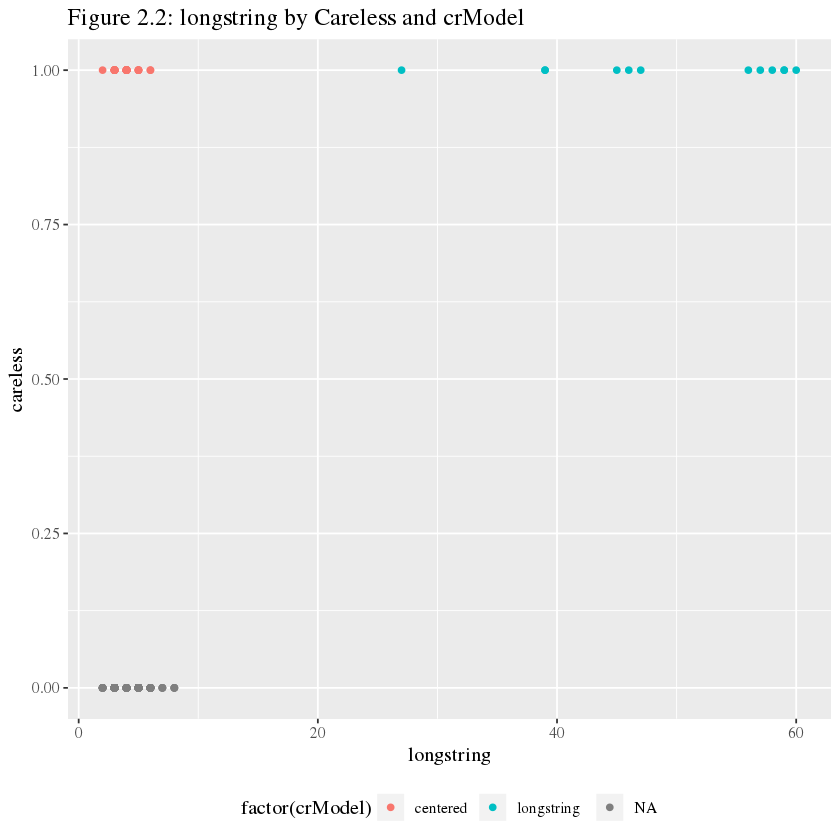

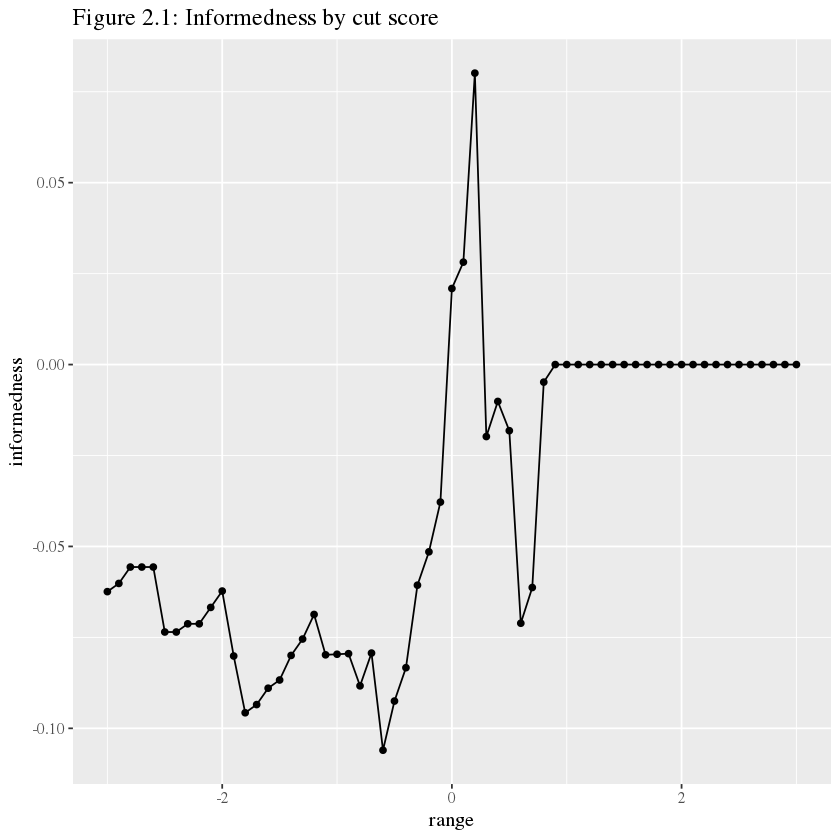

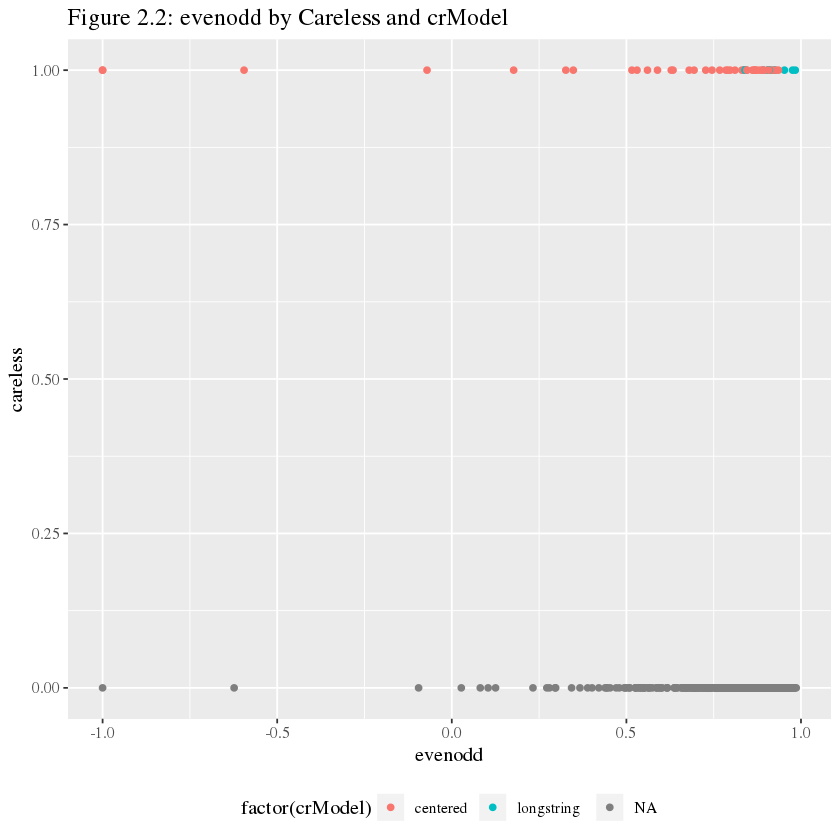

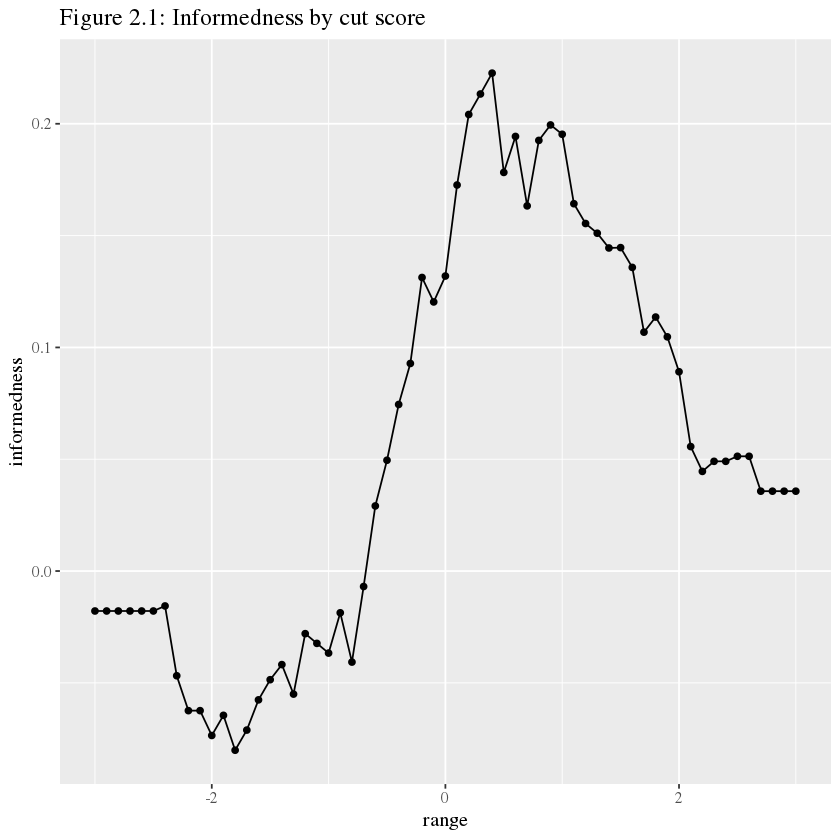

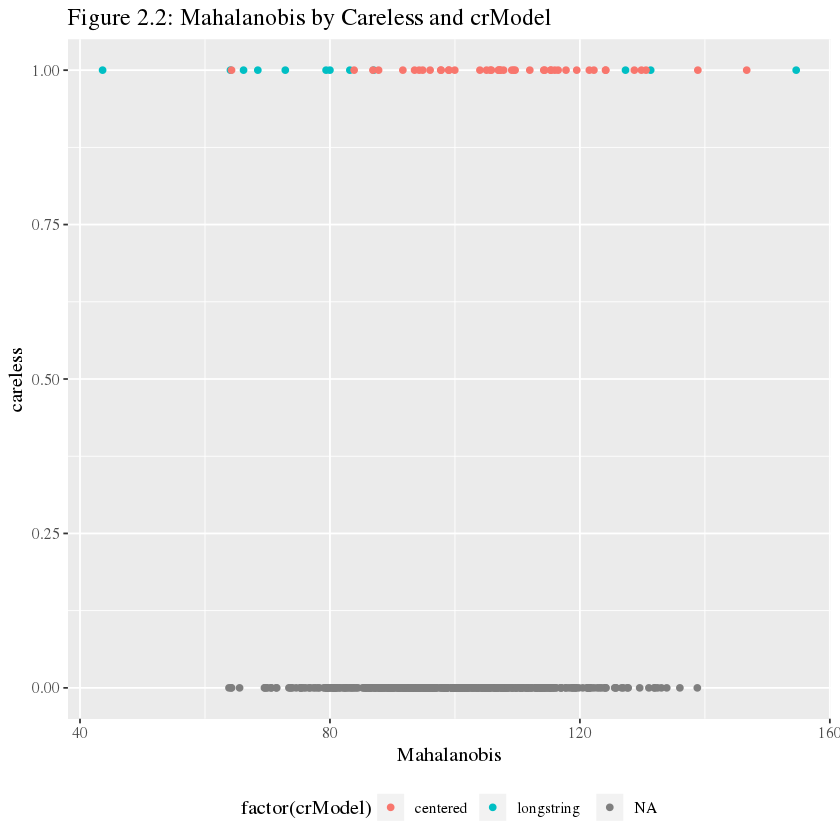

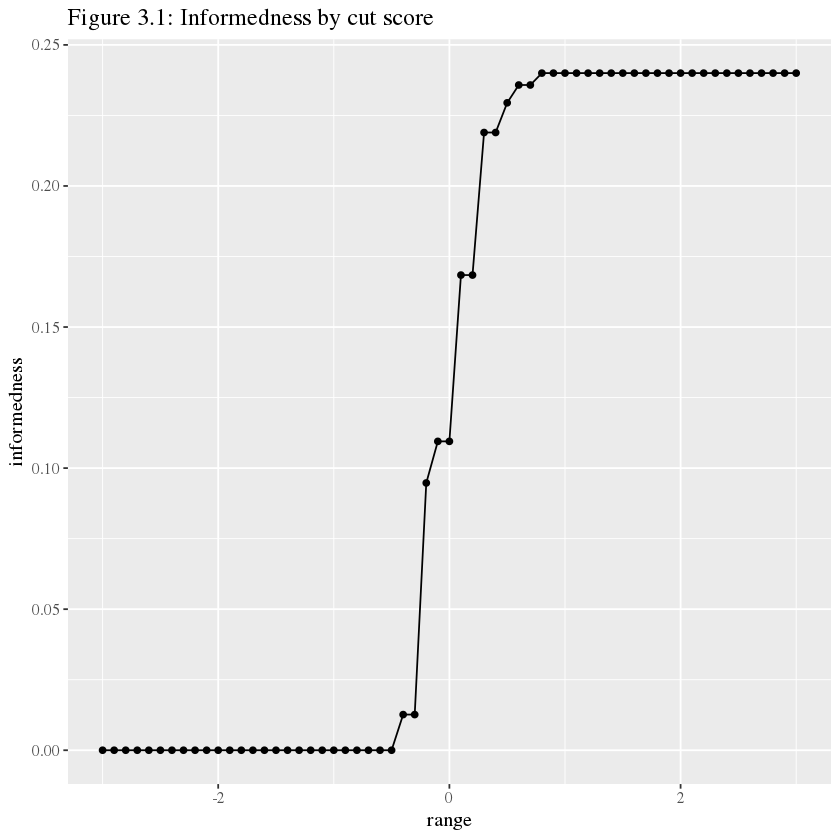

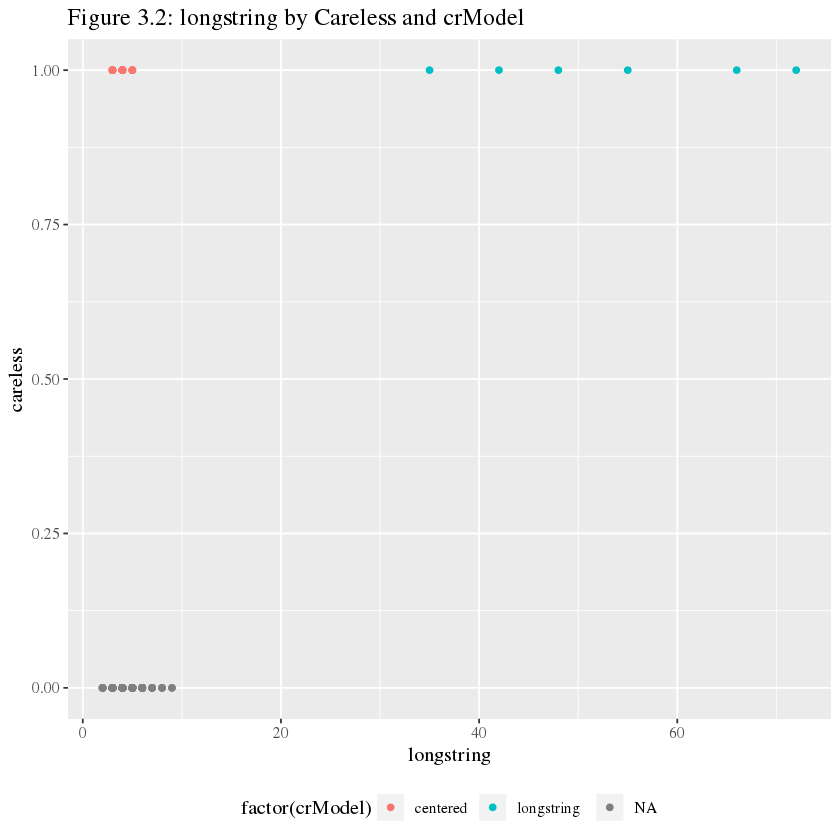

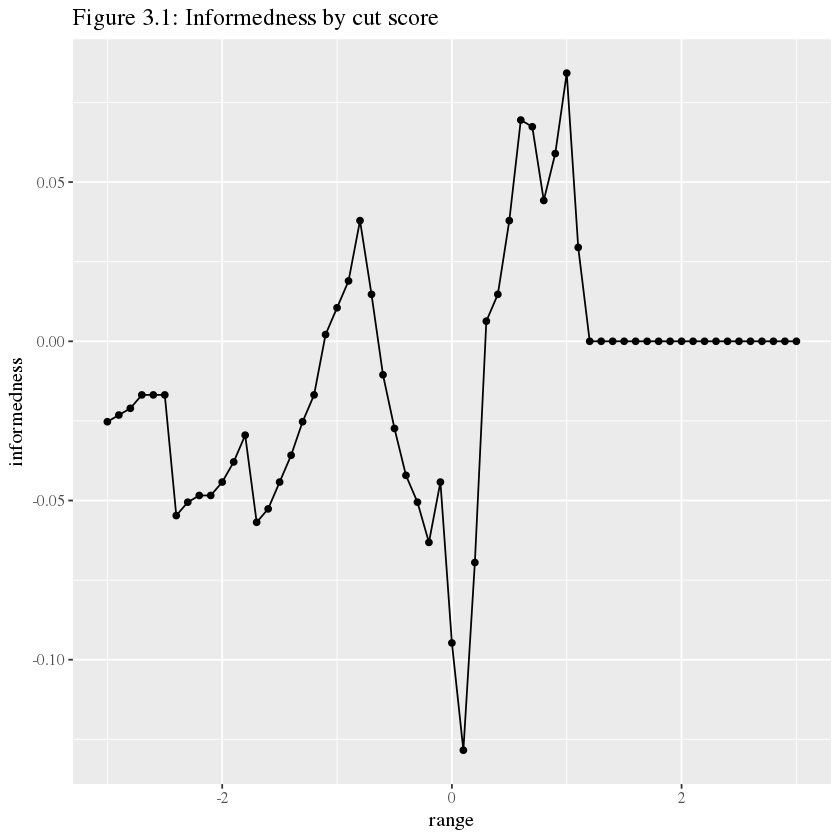

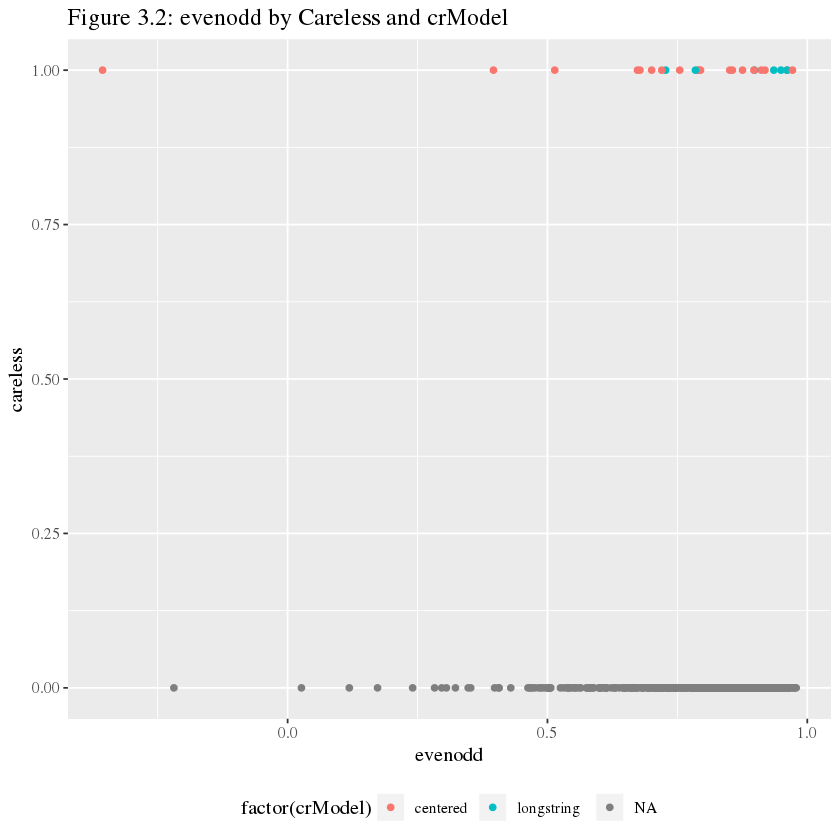

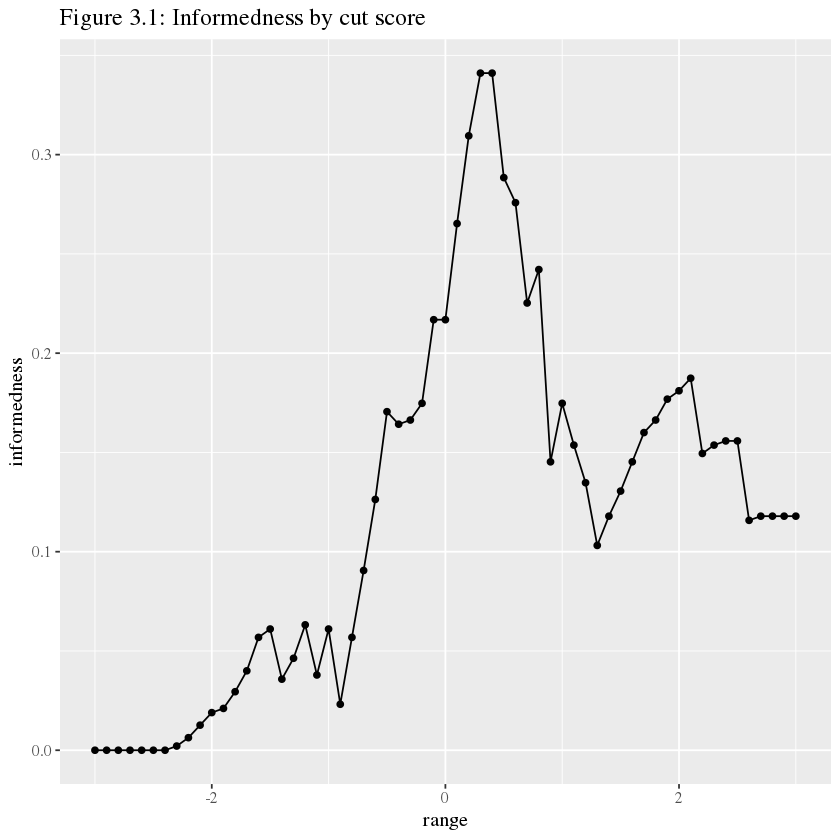

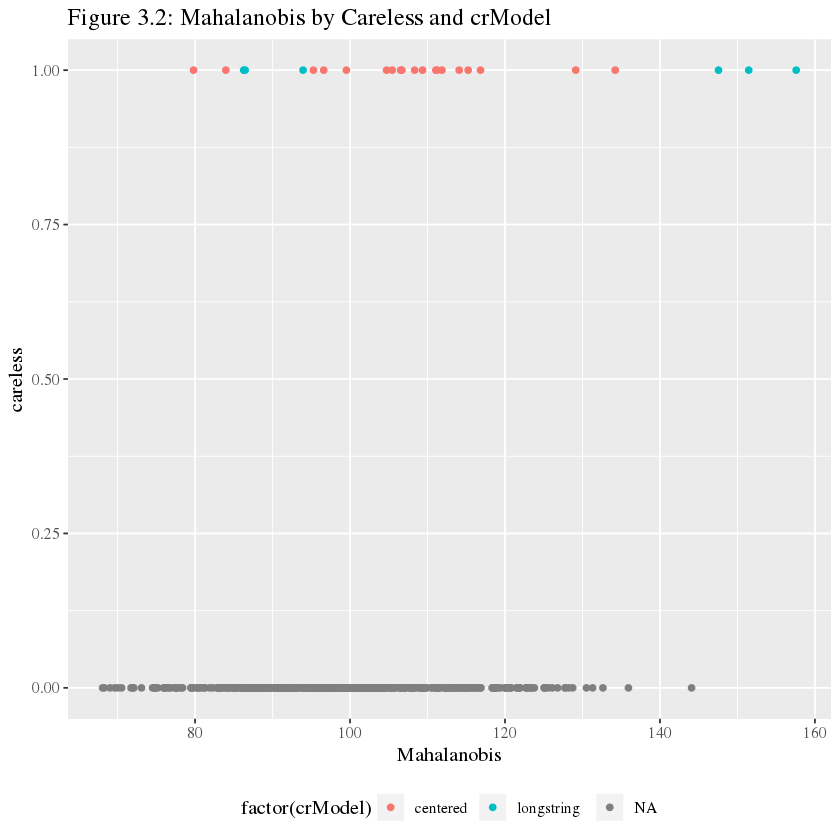

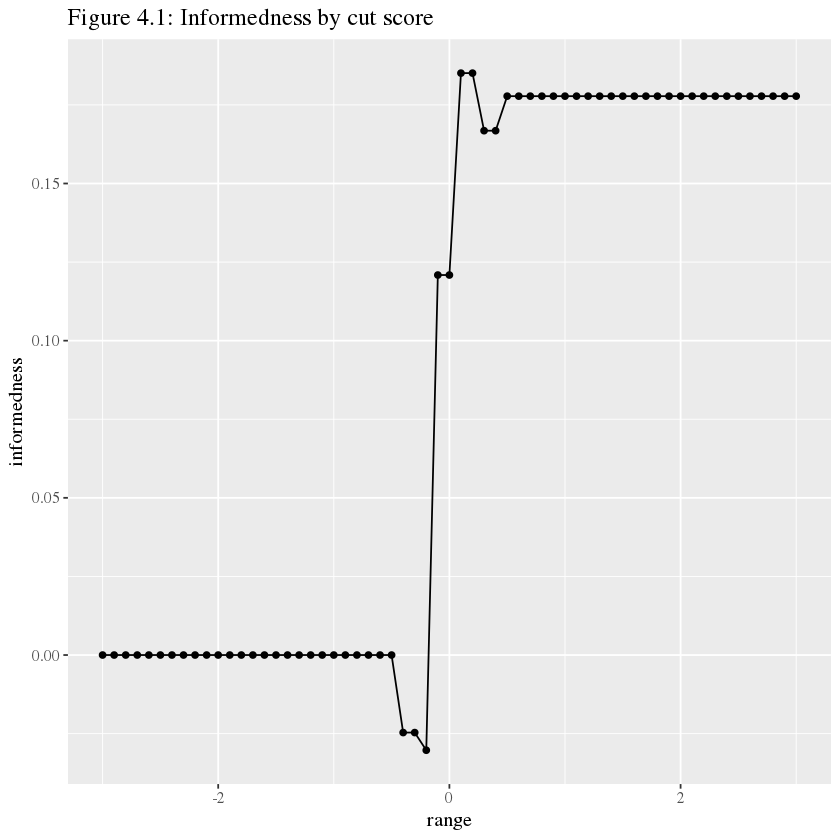

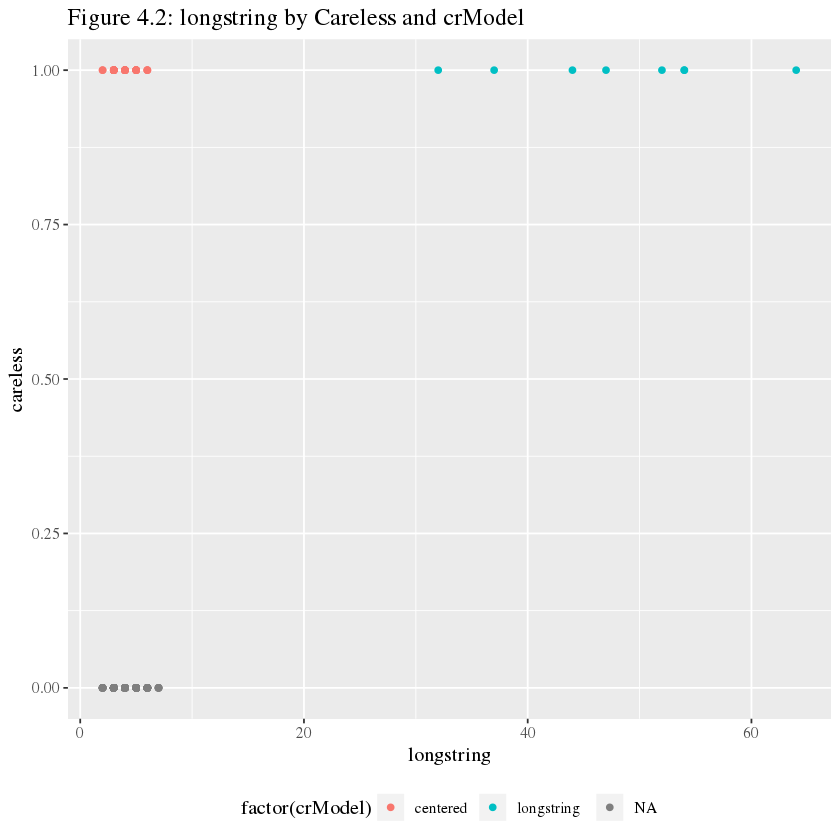

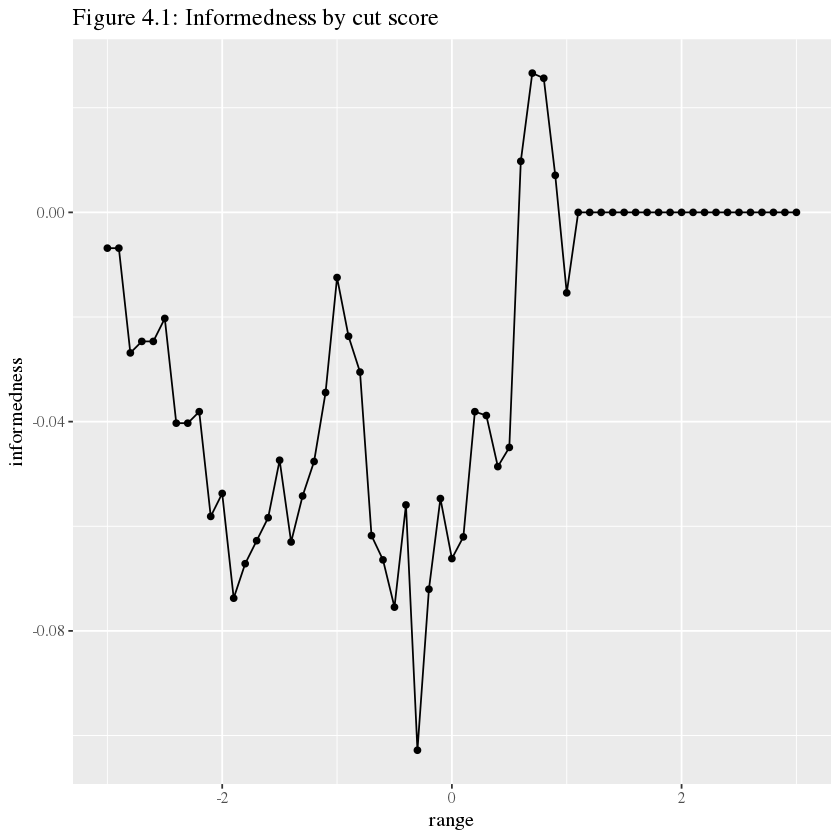

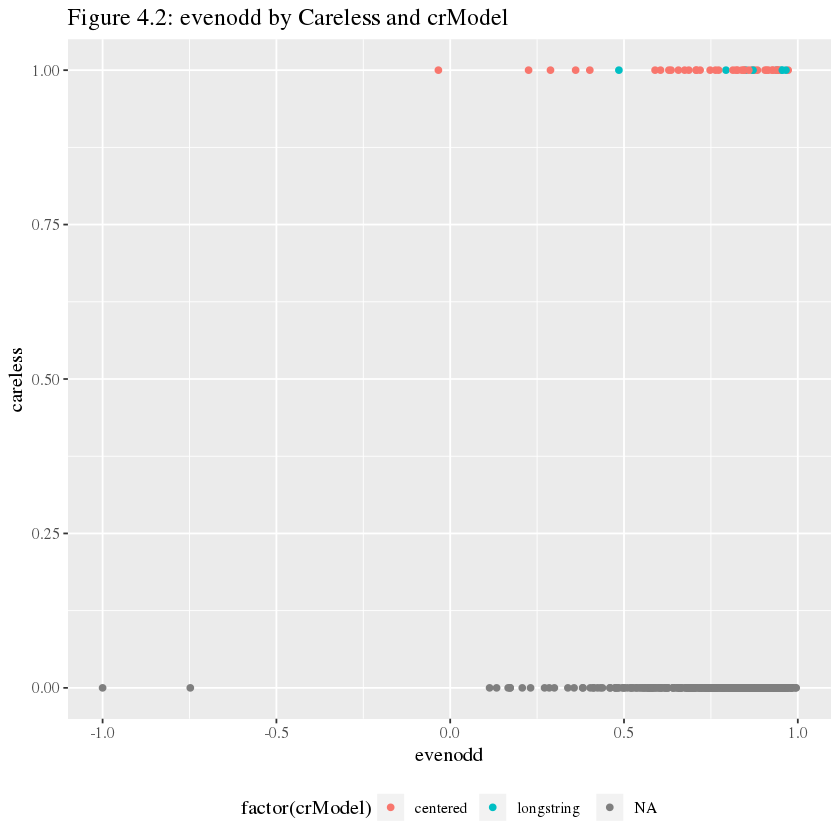

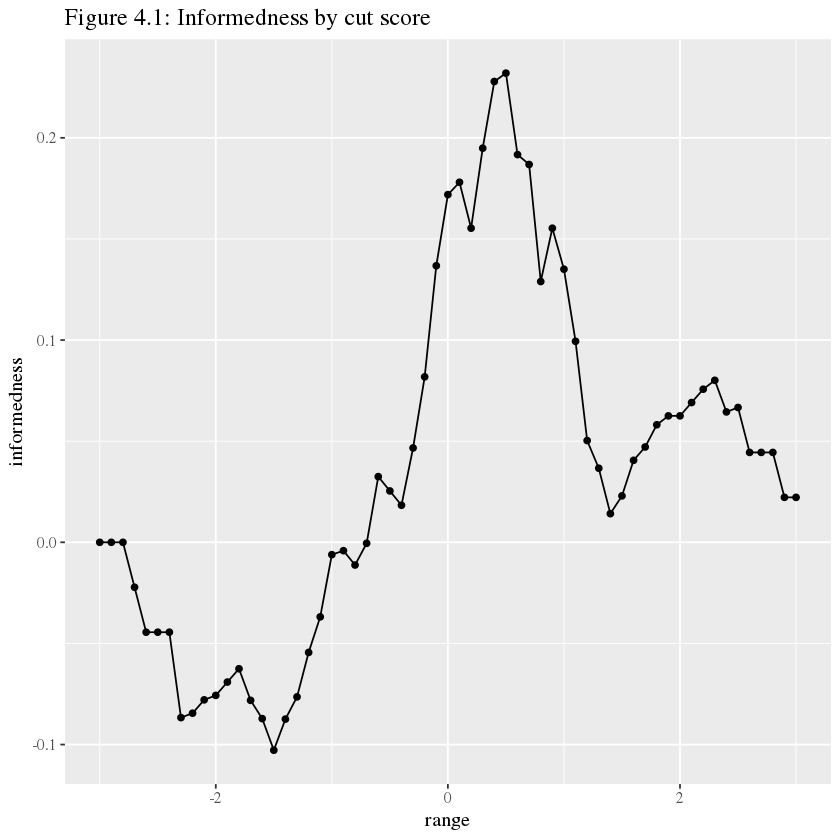

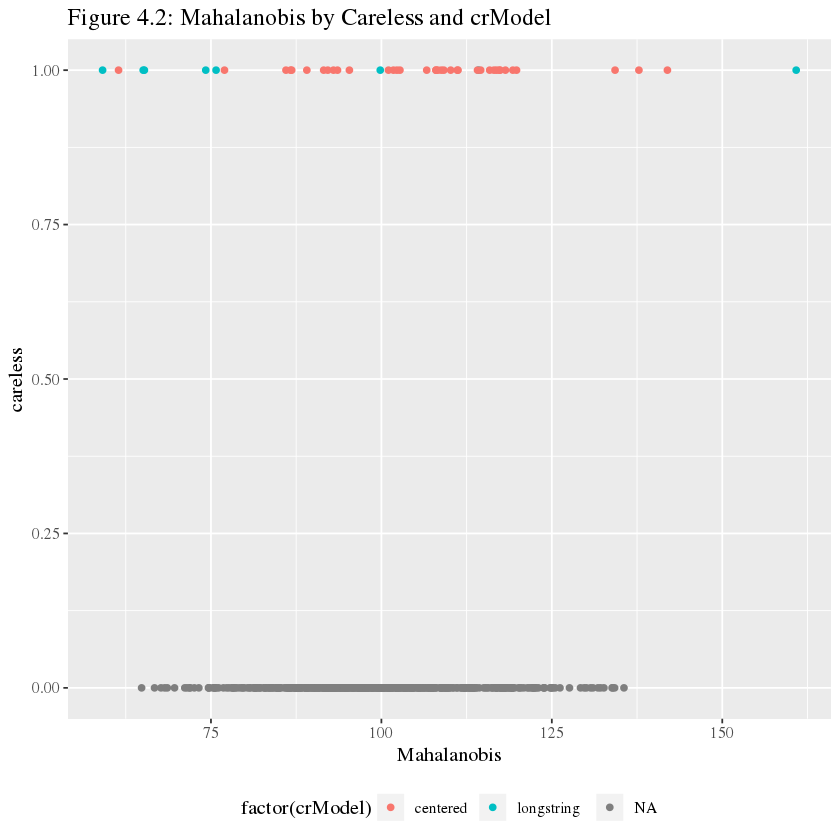

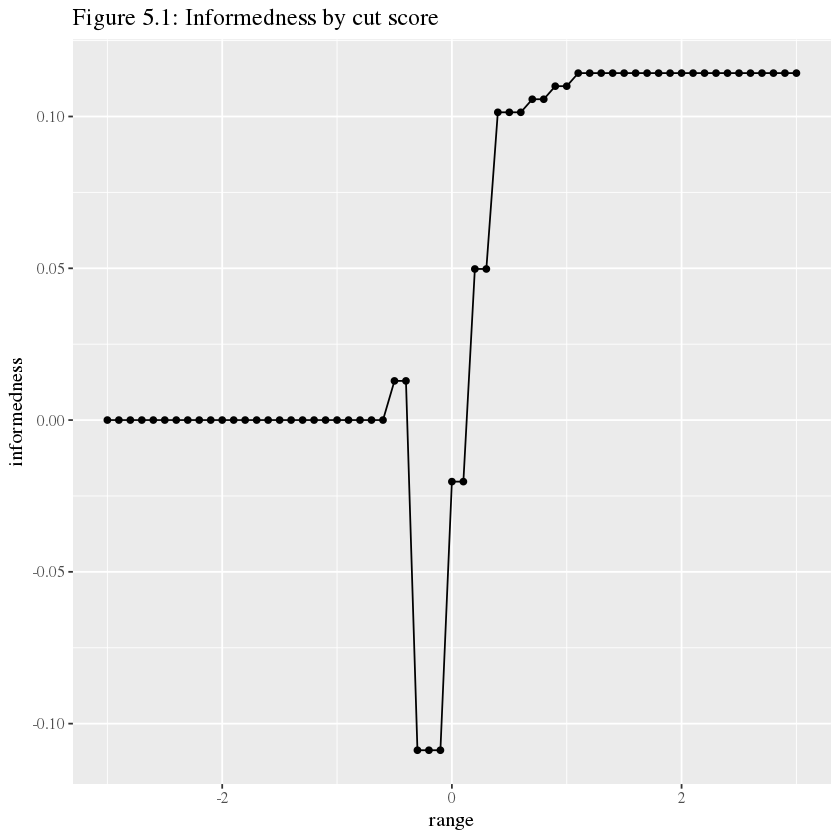

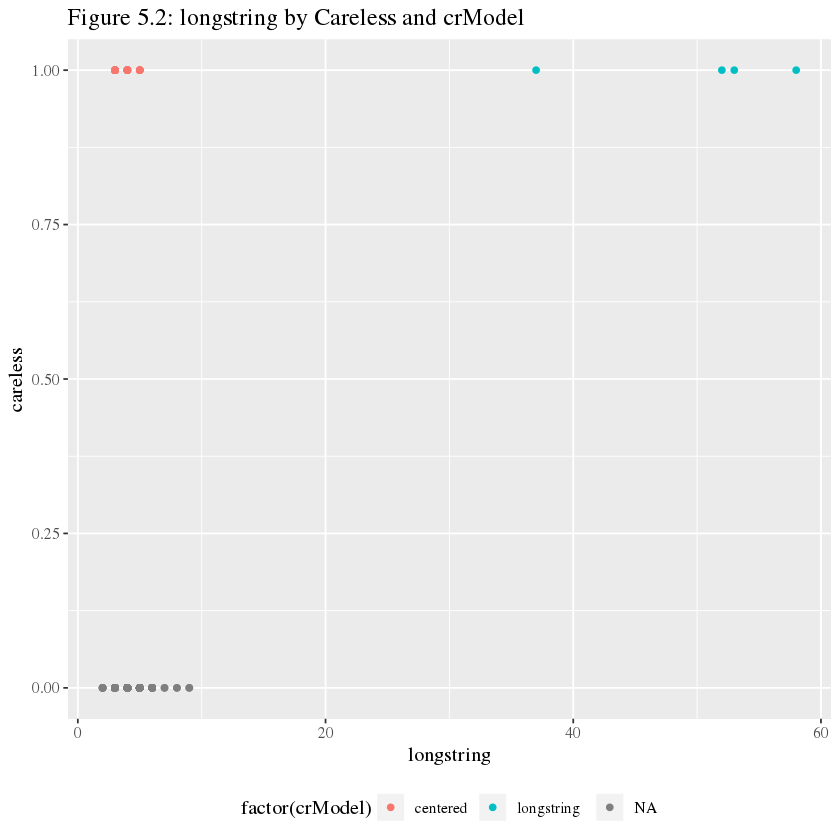

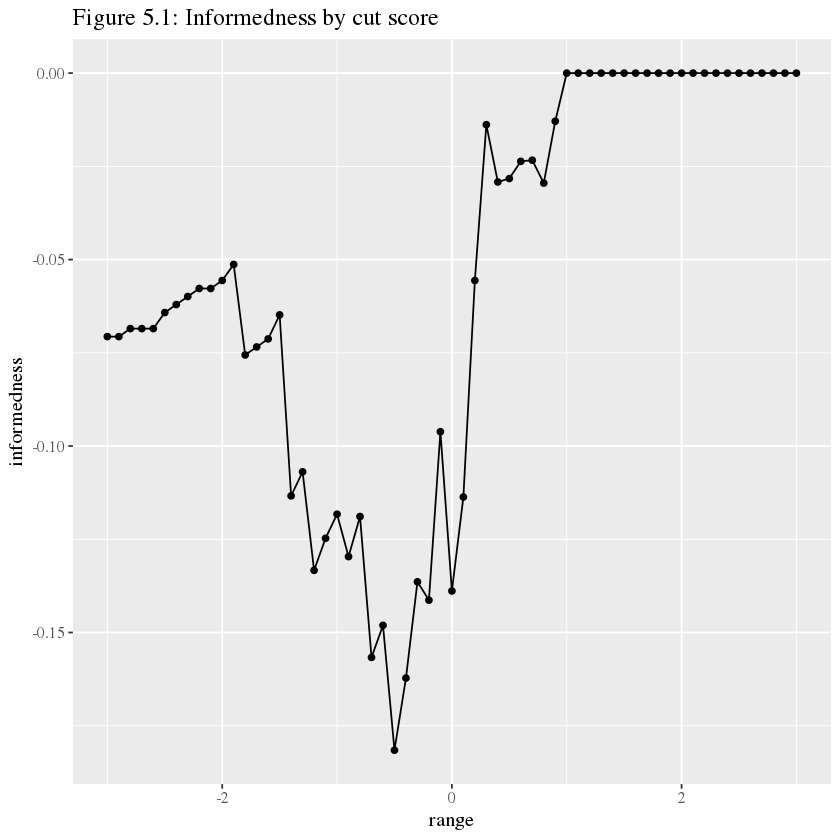

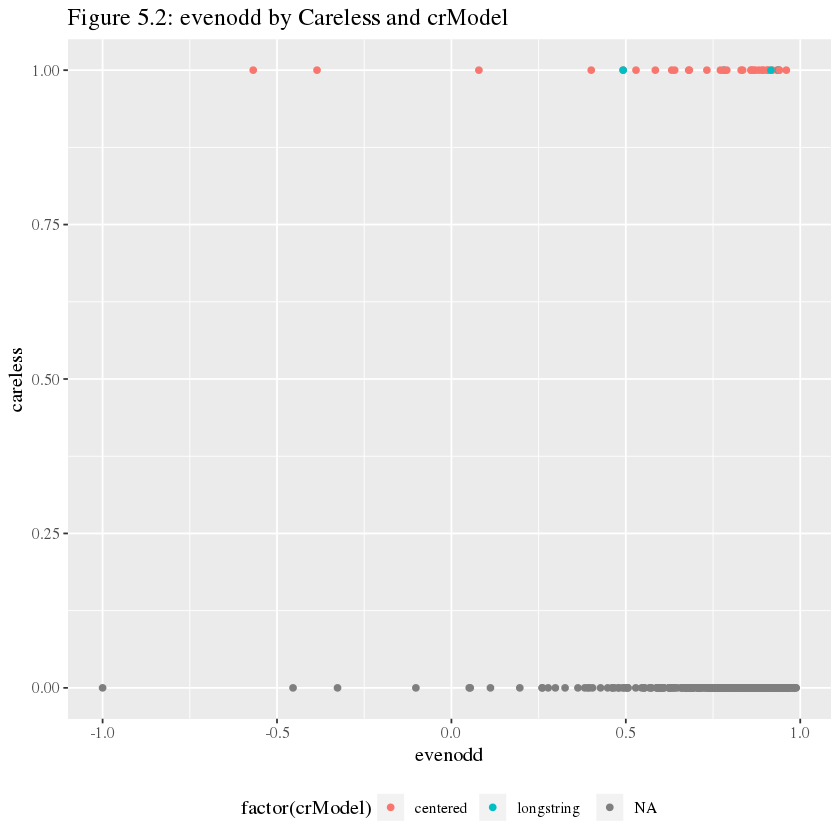

[[1]]
[[1]][[1]]

[[1]][[2]]

[[1]][[3]]

[[1]][[4]]

[[1]][[5]]

[[1]][[6]]


[[2]]
[[2]][[1]]

[[2]][[2]]

[[2]][[3]]

[[2]][[4]]

[[2]][[5]]

[[2]][[6]]


[[3]]
[[3]][[1]]

[[3]][[2]]

[[3]][[3]]

[[3]][[4]]

[[3]][[5]]

[[3]][[6]]


[[4]]
[[4]][[1]]

[[4]][[2]]

[[4]][[3]]

[[4]][[4]]

[[4]][[5]]

[[4]][[6]]


[[5]]
[[5]][[1]]

[[5]][[2]]

[[5]][[3]]

[[5]][[4]]

[[5]][[5]]

[[5]][[6]]



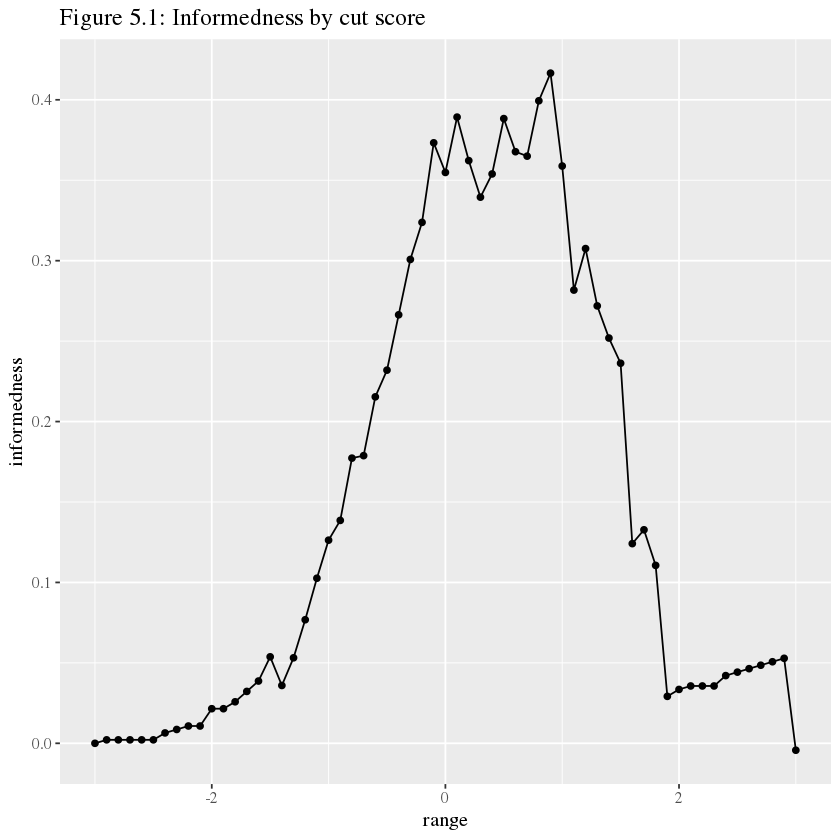

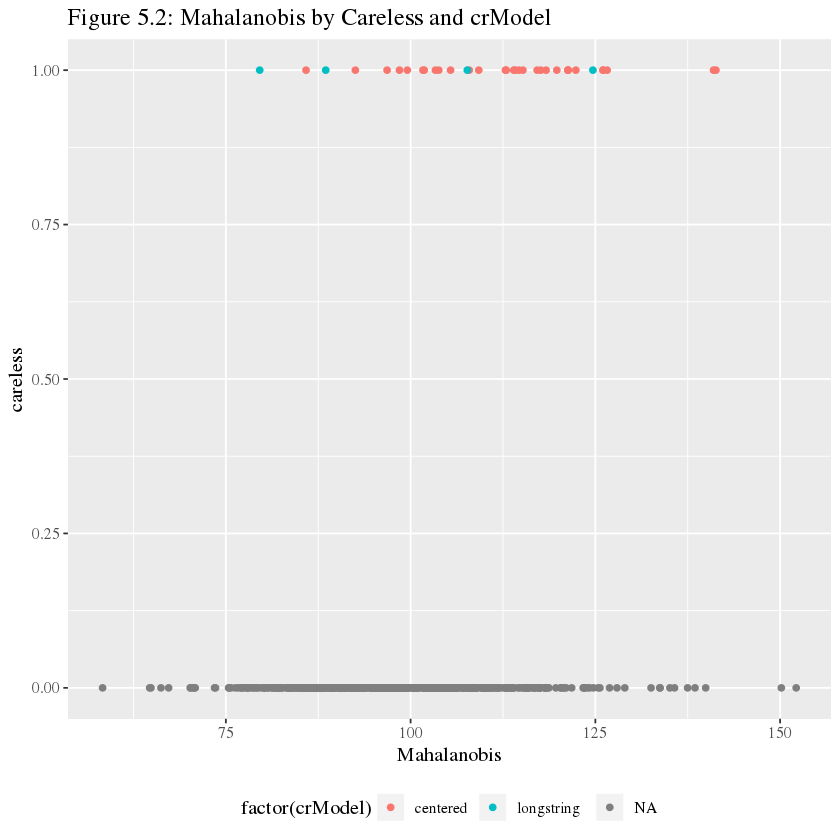

In [5]:
registerDoParallel(24)
foreach(i=1:nDatasets, .verbose=FALSE) %dopar% {
    addHandler(writeToFile, file=glue::glue('~/dissertation/logs/rq1/sim{i}.log'), level='INFO')
    logstring <- glue::glue('dis.rq1.{i}')

    datasetstring <- glue::glue("data/simsample{i}.RData")
    logging::loginfo(glue::glue('dataset loaded from data/simsample{i}'), logger=logstring)
    

    load(datasetstring)
    logging::loginfo(glue::glue('dataframe has been loaded from: {datasetstring}'), logger=logstring)
    
    hexkey <- read.csv('sourcedata/hexkey.csv', header=FALSE)[1:100]
    hexkey <- which(hexkey==-1)
    logging::loginfo(glue::glue('hexaco key has been loaded for reverse coding'), logger=logstring)
    
    rcdf <- rdydisstools::reverseCode(df[,1:100], hexkey, max=7)
    logging::loginfo(glue::glue('reverse coded dataframe has been saved to rcdf'), logger=logstring)
    rcdf <- cbind.data.frame(rcdf, df[,101:102])
    logging::loginfo(glue::glue('this is probs where it failed.'), logger=logstring)
    
    ls <- dispatchRQ1(df, what='longstring', from=-3, to=3, by=.1, i=i)
    logging::loginfo(glue::glue('RQ1 - Longstring returned'), logger=logstring)
    eo <- dispatchRQ1(rcdf, what="evenodd", factors=rep(10,10), from=-3, to=3, by=.1, i=i)
    logging::loginfo(glue::glue('RQ1 - EvenOdd returned'), logger=logstring)
    md <- dispatchRQ1(rcdf, what="mahad", from=-3, to=3, by=.1, i=i)
    logging::loginfo(glue::glue('RQ1 - mahalanobis returned'), logger=logstring)

    lsJPlot <- plot(ls$informedness, i)
    lsCRMetricPlot <- plot(ls$metric, 'longstring', i)
    eoJPlot <- plot(eo$informedness, i)
    eoCRMetricPlot <- plot(eo$metric, 'evenodd', i)
    mdJPlot <- plot(md$informedness, i)
    mdCRMetricPlot <- plot(md$metric, "Mahalanobis", i)
    
    
    list(lsJPlot, lsCRMetricPlot, eoJPlot, eoCRMetricPlot, mdJPlot, mdCRMetricPlot)
}

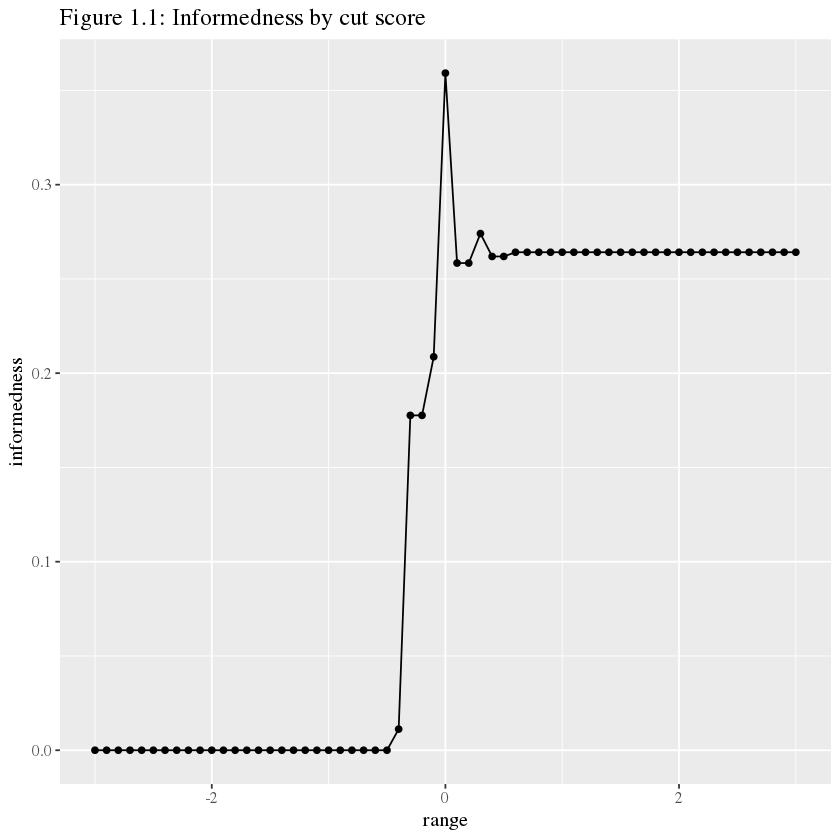

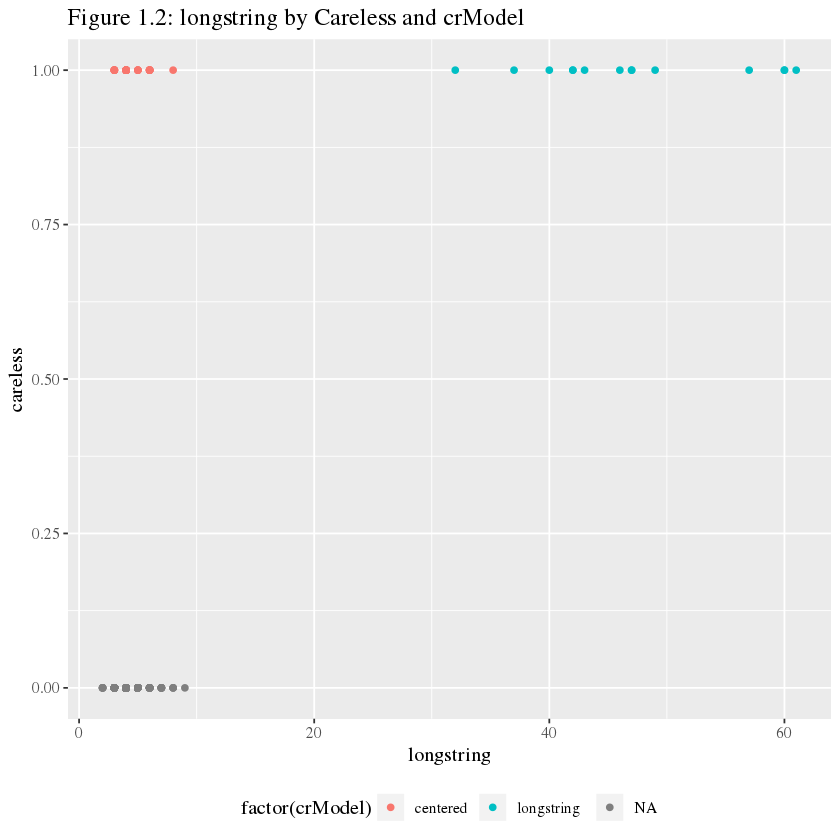

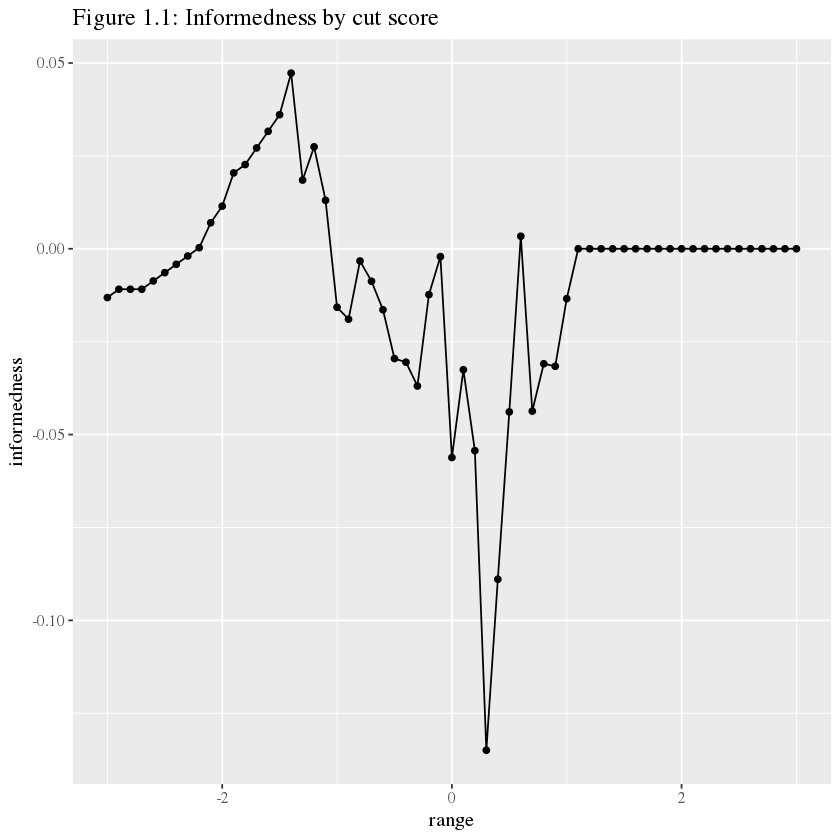

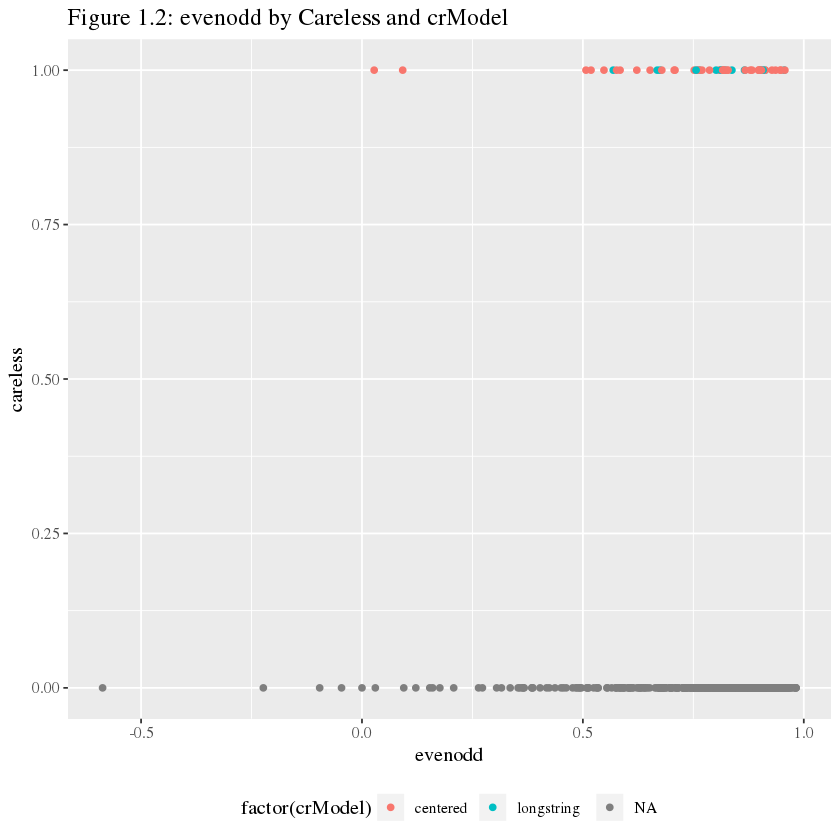

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]


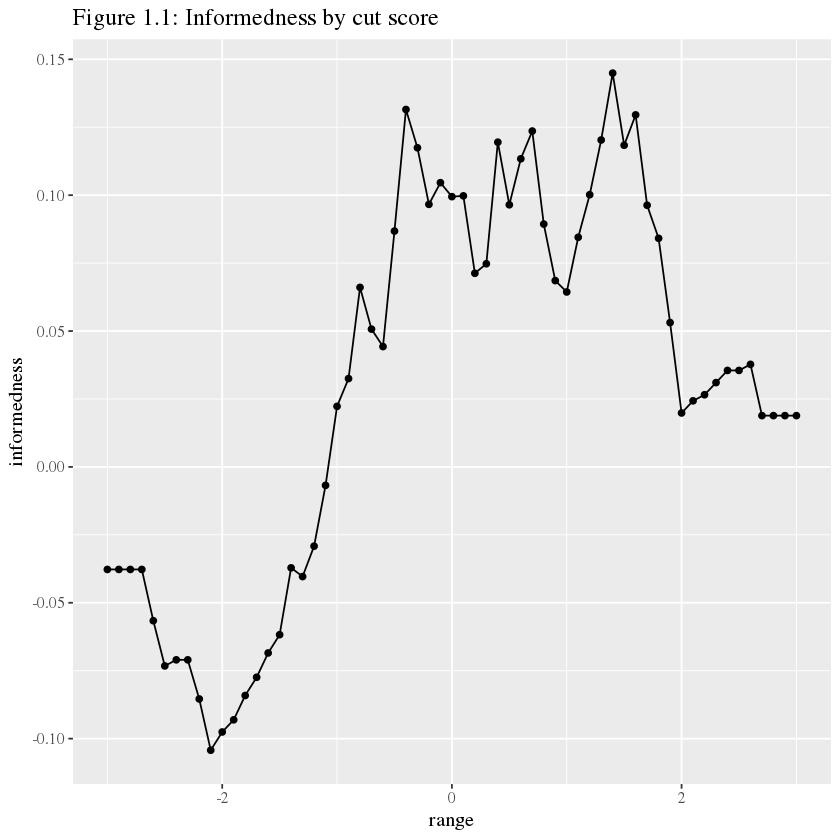

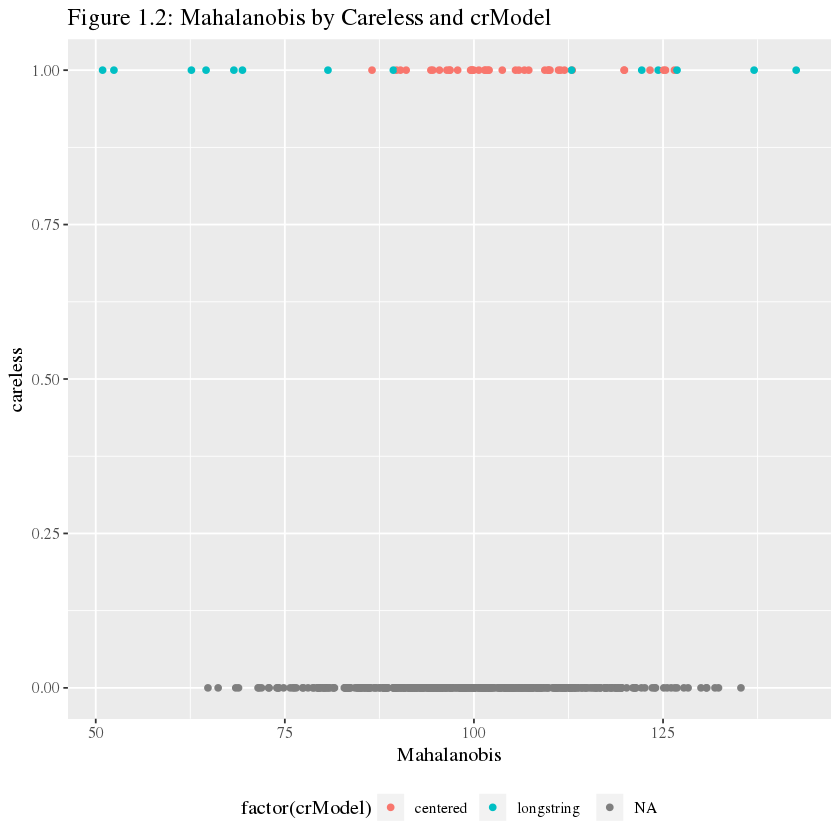

In [3]:
i <- 1
datasetstring <- glue::glue("data/simsample{i}.RData")
load(datasetstring)
hexkey <- read.csv('sourcedata/hexkey.csv', header=FALSE)[1:100]
hexkey <- which(hexkey==-1)
    
rcdf <- rdydisstools::reverseCode(df[,1:100], hexkey, max=7)
rcdf <- cbind(rcdf, df[,101:102])
    
ls <- dispatchRQ1(df, what='longstring', from=-3, to=3, by=.1, i=i)
eo <- dispatchRQ1(rcdf, what="evenodd", factors=rep(10,10), from=-3, to=3, by=.1, i=i)
md <- dispatchRQ1(rcdf, what="mahad", from=-3, to=3, by=.1, i=i)

lsJPlot <- plot(ls$informedness, i)
lsCRMetricPlot <- plot(ls$metric, 'longstring', i)
eoJPlot <- plot(eo$informedness, i)
eoCRMetricPlot <- plot(eo$metric, 'evenodd', i)
mdJPlot <- plot(md$informedness, i)
mdCRMetricPlot <- plot(md$metric, "Mahalanobis", i)
    
    
list(lsJPlot, lsCRMetricPlot, eoJPlot, eoCRMetricPlot, mdJPlot, mdCRMetricPlot)